# Graphs Scripts

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re  # Importing regular expressions to handle sanitization

# Read data from the specified file
file_path = './Latency/Latency_outputs.xlsx'
output_directory = './box_whisker'
os.makedirs(output_directory, exist_ok=True)

# Read the data into a DataFrame
df = pd.read_excel(file_path)

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Check the column names to ensure there are no hidden characters or issues
print("Columns in the DataFrame:", df.columns)

# Define the columns for which to generate box and whisker plots
columns_to_plot = [
    "total duration(s)",
    "load duration(s)",
    "prompt eval duration(s)",
    "prompt eval rate(token/s)",
    "eval count",
    "eval duration(s)",
    "eval rate(token/s)"
]

# Function to sanitize column names by removing or replacing problematic characters
def sanitize_column_name(column_name):
    # Replace backslashes, slashes, and other invalid characters with underscores
    return re.sub(r'[\\/:*?"<>|]', '_', column_name)

# Function to plot box and whisker plots and save them
def plot_and_save_box_whisker(dataframe, columns, prompt_column='prompt', output_dir=output_directory):
    for column in columns:
        # Ensure the column exists in the DataFrame before plotting
        if column not in dataframe.columns:
            print(f"Warning: Column '{column}' not found in DataFrame.")
            continue

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=dataframe, x=prompt_column, y=column)
        plt.title(f"Box and Whisker Plot for {column} by Prompt Type")
        plt.xlabel("Prompt Type")
        plt.ylabel(column)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        
        # Sanitize the column name before saving the plot
        sanitized_column = sanitize_column_name(column)
        output_path = os.path.join(output_dir, f"{sanitized_column}_box_whisker.png")
        plt.savefig(output_path)
        plt.close()

# Generate and save plots
plot_and_save_box_whisker(df, columns_to_plot)


Columns in the DataFrame: Index(['total duration(s)', 'load duration(s)', 'prompt eval count',
       'prompt eval duration(s)', 'prompt eval rate(token/s)', 'eval count',
       'eval duration(s)', 'eval rate(token/s)', 'model', 'mobile',
       'sytem prompt template', 'prompt'],
      dtype='object')


In [4]:
df["context length"] = df["eval count"] + df["prompt eval count"]

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


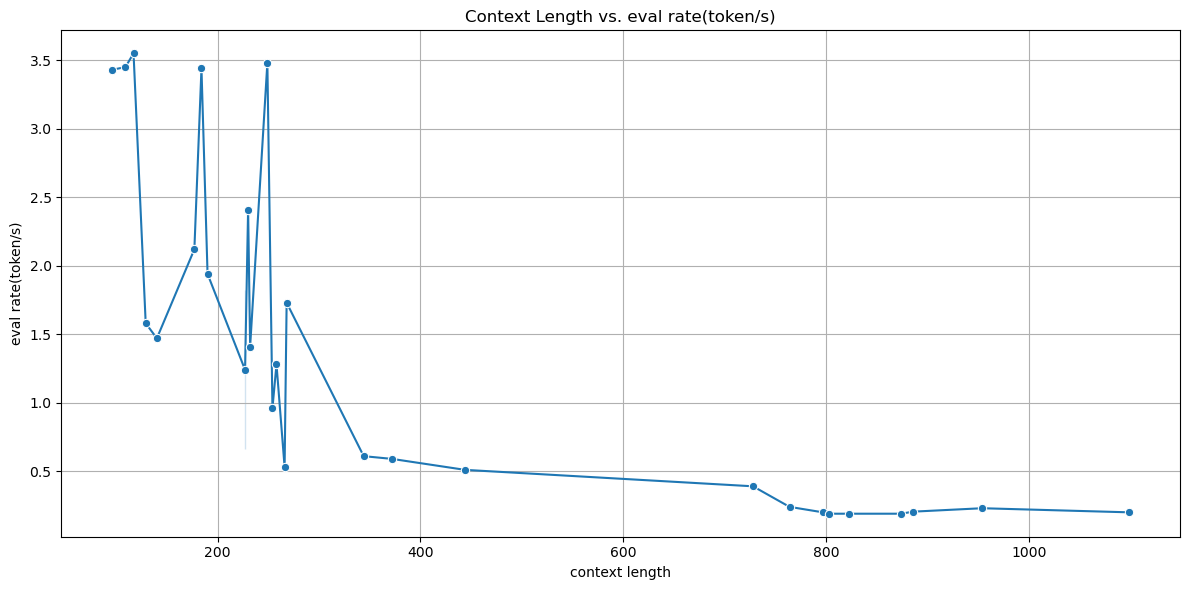

In [13]:
def plot_context_length_vs_eval_rate(dataframe, x_column, y_column, output_dir=output_directory):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=dataframe, x=x_column, y=y_column, marker='o')
    plt.title(f"Context Length vs. {y_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.tight_layout()

    # Save the line graph
    output_path = os.path.join(output_dir, f"context_length_vs_{sanitize_column_name(y_column)}.png")
    plt.savefig(output_path)
    plt.show()
    plt.close()

# Plot and save the graph for context length vs eval rate

plot_context_length_vs_eval_rate(df, "context length", "eval rate(token/s)")

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


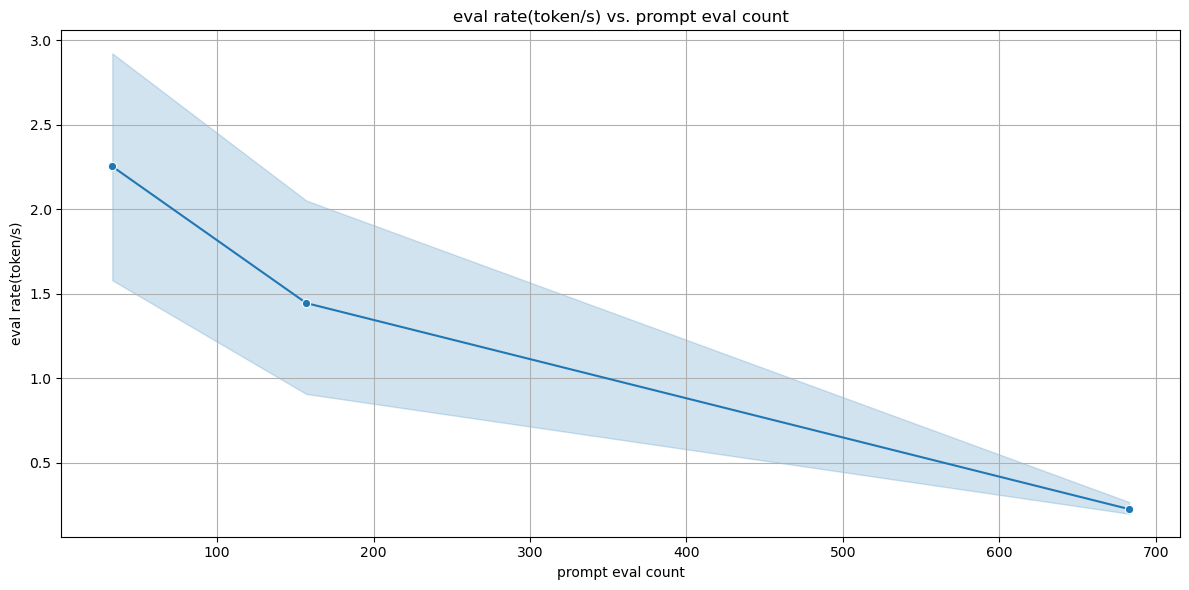

In [17]:
# Plot Eval Rate vs Prompt Eval Tokens
def plot_eval_rate_vs_prompt_eval_tokens(dataframe, x_column, y_column, output_dir=output_directory):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=dataframe, x=x_column, y=y_column, marker='o')
    plt.title(f"{y_column} vs. {x_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.tight_layout()

    # Save the line graph
    output_path = os.path.join(output_dir, f"{sanitize_column_name(x_column)}_vs_{sanitize_column_name(y_column)}.png")
    plt.savefig(output_path)
    plt.show()
    plt.close()

# Check for the required columns and plot the graph

plot_eval_rate_vs_prompt_eval_tokens(df, "prompt eval count", "eval rate(token/s)")
